<a href="https://colab.research.google.com/github/Anthonyyoyo/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/AnthonyG_LS_DS_114_Making_Data_backed_Assertions2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [2]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
from collections import namedtuple

User = namedtuple('User', ['purchased','time_on_site', 'mobile'])
example_user = User(False, 12, False)
example_user

User(purchased=False, time_on_site=12, mobile=False)

In [8]:
example_user[1]

12

In [11]:
#Changes with every run
random.uniform(10, 600)

483.47958086183854

In [12]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [13]:
import numpy as np

np.random.normal(10,2)

10.867157443897732

In [14]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2.5*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=False, time_on_site=477.1960516594001, mobile=True),
 User(purchased=False, time_on_site=591.39463642989, mobile=False),
 User(purchased=False, time_on_site=269.3166645952039, mobile=True),
 User(purchased=True, time_on_site=527.4918630005394, mobile=True),
 User(purchased=True, time_on_site=190.33302199291774, mobile=False),
 User(purchased=False, time_on_site=569.3552847689216, mobile=False),
 User(purchased=True, time_on_site=484.38627537497746, mobile=False),
 User(purchased=False, time_on_site=389.5882584704165, mobile=True),
 User(purchased=True, time_on_site=422.0381355323397, mobile=True),
 User(purchased=False, time_on_site=618.0929684468699, mobile=False)]

In [19]:
#normal random with two arguments means and SD
import numpy as np
np.random.normal(10, 2)

8.567844811797357

In [15]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,False,477.196052,True
1,False,591.394636,False
2,False,269.316665,True
3,True,527.491863,True
4,True,190.333022,False


In [20]:
user_data['time_on_site_min'] = user_data['time_on_site']/60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,False,477.196052,True,7.953268
1,False,591.394636,False,9.856577
2,False,269.316665,True,4.488611
3,True,527.491863,True,8.791531
4,True,190.333022,False,3.172217


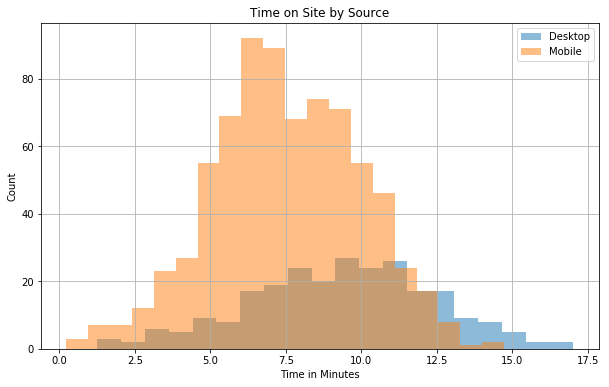

In [25]:
#Creating histogram of time on site per min based on mobile users

import matplotlib.pyplot as plt

user_data.groupby('mobile')['time_on_site_min'].hist(bins=20, alpha=0.5, figsize=(10, 6))

plt.title('Time on Site by Source')
plt.xlabel('Time in Minutes')
plt.ylabel('Count')
plt.legend(['Desktop', 'Mobile'])

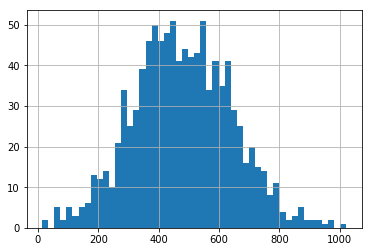

In [17]:
user_data['time_on_site'].hist(bins=50)

In [0]:
# Convert seconds to minutes (for comparison)
user_data['time_on_site_min'] = user_data['time_on_site'] / 60
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,False,285.015654,True,4.750261
1,False,555.306570,True,9.255109
2,True,316.331878,False,5.272198
3,False,635.183542,True,10.586392
4,False,346.850329,False,5.780839


In [0]:
# Find negative time data
user_data[user_data.time_on_site < 0.0]

,purchased,time_on_site,mobile,time_on_site_min
454,False,-9.838808,True,-0.163980
680,False,-71.060583,False,-1.184343


In [0]:
# Assign negative time_on_site values to 0.0
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site'] = 0.0
user_data[user_data.time_on_site < 0.0] # confirm no zeros

,purchased,time_on_site,mobile,time_on_site_min


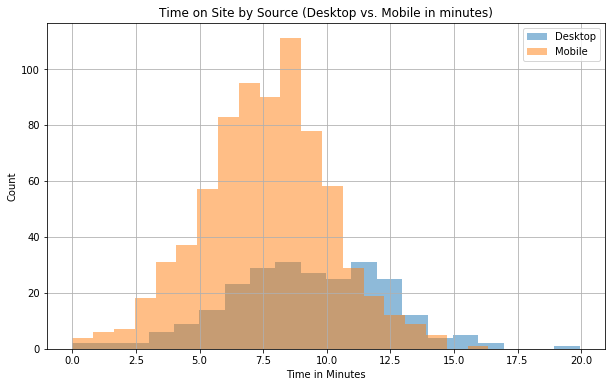

In [0]:
import matplotlib.pyplot as plt

user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.title('Time on Site by Source (Desktop vs. Mobile in minutes)');
plt.ylabel('Count')
plt.xlabel('Time in Minutes')
plt.legend(['Desktop','Mobile']);

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,0.0,3.0285036712932083,9.721226060890103,30.821765737178396,40.58130156230504,68.47907090179973,71.11661080344567,77.2709590565463,77.95136272847662,85.03973644096402,87.63727651236951,95.42732048625476,96.991459736725,103.4061161154873,108.49787718944799,109.6747491901994,127.07532578418011,129.8727348475835,133.63041975019962,135.9957143721574,140.63029666453366,143.25751492945165,150.17700521832074,150.2114554541024,158.2678892349996,162.43659667207214,167.61625719998563,168.40482150692003,169.74208989365803,171.8753926018191,174.17018469655687,175.86683017255802,177.51404660336362,179.6555056400906,184.34024853128773,184.9151163948515,191.1345207604267,191.7180980868505,192.7326868256078,193.18162906937692,...,777.724936597747,780.8518208113812,787.205264990241,788.2025802757564,788.8501997180151,790.3872013347907,793.3476181131414,796.0551094295059,798.3992047528309,799.8831522491607,804.1879733151068,807.9306487048157,811.6472213021195,812.9401767647412,814.4607647890188,814.7900188433573,815.2515402782735,816.6210668335766,824.1201355662944,824.602580730429,825.6955669669555,826.7132726710965,847.9797592064529,848.8148439189026,856.7517358673776,858.1755639127041,865.414069720297,867.6179554276248,870.4264375761616,871.8475297069019,893.4134572716619,898.0130210924046,900.8822569343163,914.4033842579952,918.6019504017138,934.4213406345956,981.319796815736,986.6457878010106,1010.0389009826024,1196.7695499229685
purchased,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,2,1,1,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,1,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,...,1,1,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
True,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,...,0,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.0199, 3.989]",0.090909,0.057143
"(3.989, 7.978]",0.454545,0.376786
"(7.978, 11.968]",0.402273,0.462500
"(11.968, 15.957]",0.052273,0.096429
"(15.957, 19.946]",0.000000,0.007143


In [0]:
pd.crosstab(columns=user_data['purchased'], index=time_bins, normalize='index')

purchased,False,True
time_on_site_min,,
"(-0.0199, 3.989]",0.555556,0.444444
"(3.989, 7.978]",0.486618,0.513382
"(7.978, 11.968]",0.405963,0.594037
"(11.968, 15.957]",0.298701,0.701299
"(15.957, 19.946]",0.000000,1.000000


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.0199, 3.989]",0.090909,0.057143
"(3.989, 7.978]",0.454545,0.376786
"(7.978, 11.968]",0.402273,0.462500
"(11.968, 15.957]",0.052273,0.096429
"(15.957, 19.946]",0.000000,0.007143


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.52,0.413333
True,0.48,0.586667


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(-0.0199, 3.989]  0.061538  0.103226  0.033333  0.063636
(3.989, 7.978]    0.353846  0.496774  0.241667  0.413636
(7.978, 11.968]   0.453846  0.380645  0.458333  0.463636
(11.968, 15.957]  0.130769  0.019355  0.241667  0.056818
(15.957, 19.946]  0.000000  0.000000  0.025000  0.002273

In [0]:
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased,False,True
time_on_site_min,,
"(-0.0199, 3.989]",0.090909,0.057143
"(3.989, 7.978]",0.454545,0.376786
"(7.978, 11.968]",0.402273,0.462500
"(11.968, 15.957]",0.052273,0.096429
"(15.957, 19.946]",0.000000,0.007143


## Stanford Open Police Project
https://openpolicing.stanford.edu/findings/

In [0]:
!unzip jb084sr9005_nj_statewide_2019_02_25.csv.zip
!ls

Archive:  jb084sr9005_nj_statewide_2019_02_25.csv.zip
  inflating: share/data/opp-for-archive/nj_statewide_2019_02_25.csv  
jb084sr9005_nj_statewide_2019_02_25.csv.zip  sample_data  share


In [0]:
%%time
df = pd.read_csv('./share/data/opp-for-archive/nj_statewide_2019_02_25.csv')
print(df.shape)

(3845334, 20)
CPU times: user 18.3 s, sys: 1.41 s, total: 19.7 s
Wall time: 19.7 s


In [0]:
df.head()

,raw_row_number,date,time,location,subject_race,subject_sex,officer_id_hash,department_id,type,violation,arrest_made,citation_issued,warning_issued,outcome,frisk_performed,search_conducted,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state
0,24723,2009-01-10,15:38:41,"31ST / CARMEN, Camden City",black,male,347f40fd4d,A010,vehicular,NaN,True,NaN,NaN,arrest,True,True,SIL,Chrysler,Town & Country,NJ
1,88239,2009-02-06,11:34:36,"@division, Ewing Twp",black,female,e84e551aad,A010,vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,101999,2009-02-11,01:34:26,"34TH / WESTFIELD, Camden City",black,male,e008ccd5a2,A010,vehicular,NaN,True,NaN,NaN,arrest,False,True,GRY,Chevrolet,NaN,PA
3,151289,2009-03-03,20:29:16,"MACARTHUR / 12TH, Camden City",black,male,b84c0f827e,A010,vehicular,NaN,True,NaN,NaN,arrest,True,True,BLU,Chevrolet,Tahoe,NJ
4,153223,2009-03-05,22:25:26,"FEDERAL / 10TH, Camden City",black,male,56eb37f85f,A010,vehicular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLK,Ford,Expedition,NJ


In [0]:
df.isna().sum()

raw_row_number                      0
date                                0
time                                0
location                            0
subject_race                   109431
subject_sex                     18787
officer_id_hash                     0
department_id                       0
type                                0
violation                      916990
arrest_made                   3719812
citation_issued                852818
warning_issued                 858842
outcome                        845936
frisk_performed               3707675
search_conducted              3703294
vehicle_color                  102890
vehicle_make                   143182
vehicle_model                 2887636
vehicle_registration_state      27617
dtype: int64

In [0]:
# What are the most common violations?
df.violation.value_counts().head(10)

39:4-97 CARELESS DRIVING                          726267
39:4-98 RATES OF SPEED                            301189
39:4-88B UNSAFE LANE CHANGE                       218747
39:3-76.2F REQ WEARING SEATBELTS                  189408
39:4-56 DELAYING TRAFFIC                          165038
39:3-66 MAINTENANCE ILLUM DEVICE                  139425
39:4-97.3 USE OF HANDS-FREE WIRELESS TELEPHONE    126905
39:4-99 EXCEED SPEED LIMITATIONS                   96289
39:3-75 SAFETY GLASS DEFINED                       82905
39:3-74 WINDSHIELD WIPERS                          73668
Name: violation, dtype: int64

In [0]:
# What can we infer about vehicle make and likelihood of getting pulled over?
df.vehicle_make.value_counts(normalize=True).head(10)

Honda         0.118632
Ford          0.106514
Toyota        0.099623
Chevrolet     0.084403
Nissan        0.081274
Dodge         0.047225
Hyundai       0.037378
Jeep          0.035211
BMW           0.034904
Volkswagen    0.028908
Name: vehicle_make, dtype: float64

In [0]:
# What can we infer about this statement? Are other confounding relationships needed (male, female, race, etc.)?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_make.value_counts(normalize=True).head(10)

Honda            0.125034
Toyota           0.107939
Ford             0.088320
Nissan           0.084921
Chevrolet        0.074299
BMW              0.043302
Dodge            0.041296
Hyundai          0.039327
Volkswagen       0.032925
Mercedes-Benz    0.031556
Name: vehicle_make, dtype: float64

In [0]:
# What about vehicle color?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_color.value_counts(normalize=True).head(10)

BLK    0.238954
SIL    0.200708
WHI    0.157833
GRY    0.110433
BLU    0.096752
RED    0.077175
GRN    0.043044
TAN    0.020111
GLD    0.019722
BGE    0.009164
Name: vehicle_color, dtype: float64

## Using %%timeit for Different Pandas Operations

In [0]:
df = pd.DataFrame({'a': np.arange(1e6),
                  'b': 2*np.arange(1e6)})
print(df.shape)
df.head()

(1000000, 2)


,a,b
0,0.0,0.0
1,1.0,2.0
2,2.0,4.0
3,3.0,6.0
4,4.0,8.0


In [0]:
%timeit df['c'] = df['a']**2

100 loops, best of 3: 15.3 ms per loop


In [0]:
from tqdm import tqdm
tqdm.pandas()

In [0]:
%timeit df['c2'] = df['a'].apply(lambda x: x**2)

1 loop, best of 3: 324 ms per loop


In [0]:
%timeit df['c3'] = df['a'].progress_apply(lambda x: x**2)

100%|██████████| 1000000/1000000 [00:01<00:00, 700210.45it/s]

1 loop, best of 3: 1.43 s per loop


## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)